___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [3]:
# CODE HERE
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
os.getcwd()

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\Pandas Datetime'

**Read in the data UMTMVS.csv file from the Data folder**

In [5]:
# CODE HERE
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\Data')

In [6]:
df = pd.read_csv('UMTMVS.csv', parse_dates = True)

**Check the head of the data**

In [7]:
# CODE HERE
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [11]:
# CODE HERE
df.set_index(df['DATE'], inplace = True)

In [13]:
df.drop('DATE', axis = 1, inplace = True)

In [14]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [21]:
# CODE HERE
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [22]:
# CODE HERE
df.index = pd.to_datetime(df.index)

In [23]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

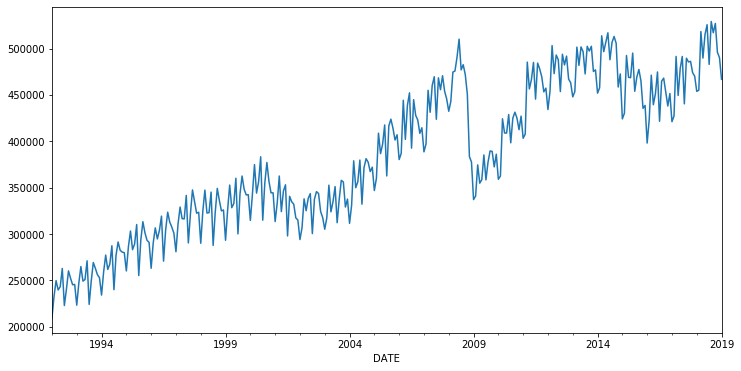

In [26]:
# CODE HERE
df.UMTMVS.plot(figsize = (12, 6))

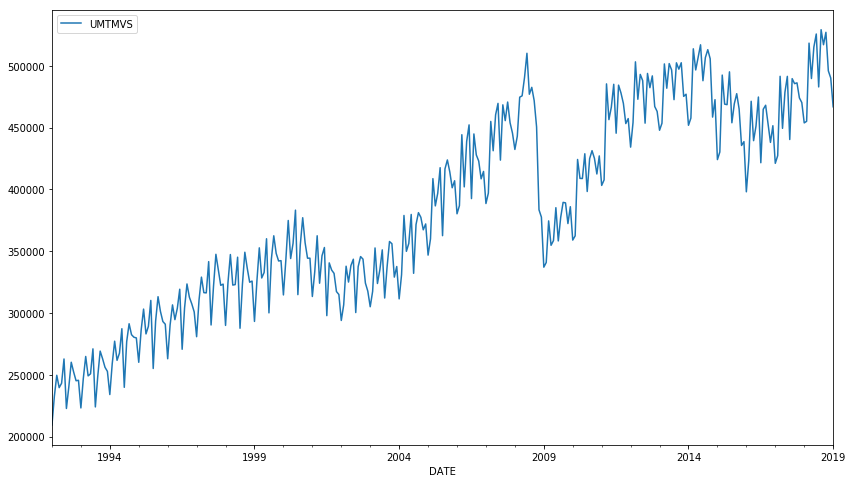

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [27]:
#CODE HERE
a = df['UMTMVS']['2009-01-01':'2019-01-01']

DATE
2009-01-01    337101.0
2009-02-01    340896.0
2009-03-01    374521.0
2009-04-01    354790.0
2009-05-01    358584.0
Name: UMTMVS, dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [38]:
#CODE HERE
#to find a percentage change for a stock price, you can simply divide the final date by the original date for the time period that you want to find the 
#percent change in and then multiply it by 100
((df['UMTMVS']['2009-01-01'])/ (df['UMTMVS']['2008-01-01']) -1) * 100

-22.02277548131305

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [55]:
#subset the dataframe for years that are greater than 2005, create a new df
b = df[df.index.year > 2005]
b.shape

(157, 1)

In [57]:
#CODE HERE
#use the idxmin() function to find the minimum
b.idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [76]:
# CODE HERE
df.resample(rule = 'M').max().sort_values(by = 'UMTMVS', ascending = False).nlargest(6, columns = 'UMTMVS')

,UMTMVS
DATE,
2018-08-31,529157.0
2018-10-31,527031.0
2018-06-30,525660.0
2018-03-31,518285.0
2018-09-30,516992.0
2014-06-30,516935.0


,UMTMVS,Yearly Mean
DATE,,
2018-08-01,529157.0,490453.500000
2018-10-01,527031.0,496482.333333
2018-06-01,525660.0,483611.000000
2018-03-01,518285.0,474351.250000
2018-09-01,516992.0,493075.583333


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [79]:
# CODE HERE
(df['UMTMVS']['2008-01-01']) - (df['UMTMVS']['2009-01-01'])

95206.0

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

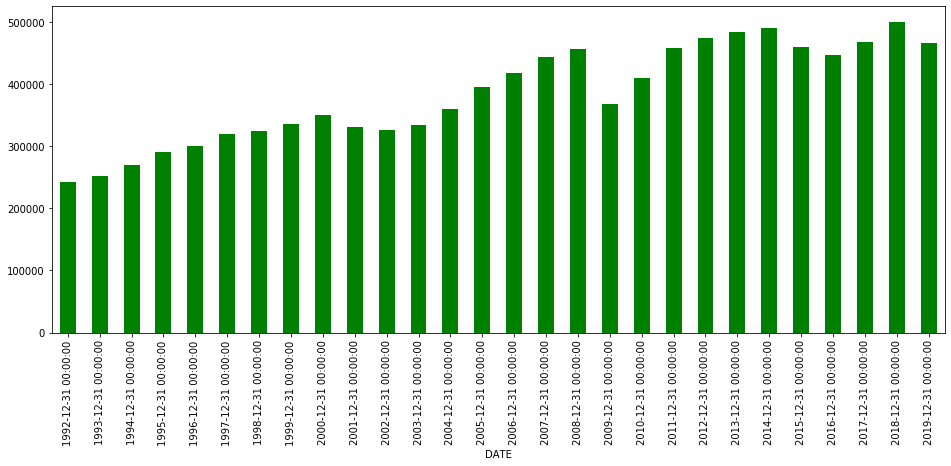

In [83]:
# CODE HERE
df['UMTMVS'].resample('A').mean().plot.bar(figsize=(16,6),color='green');

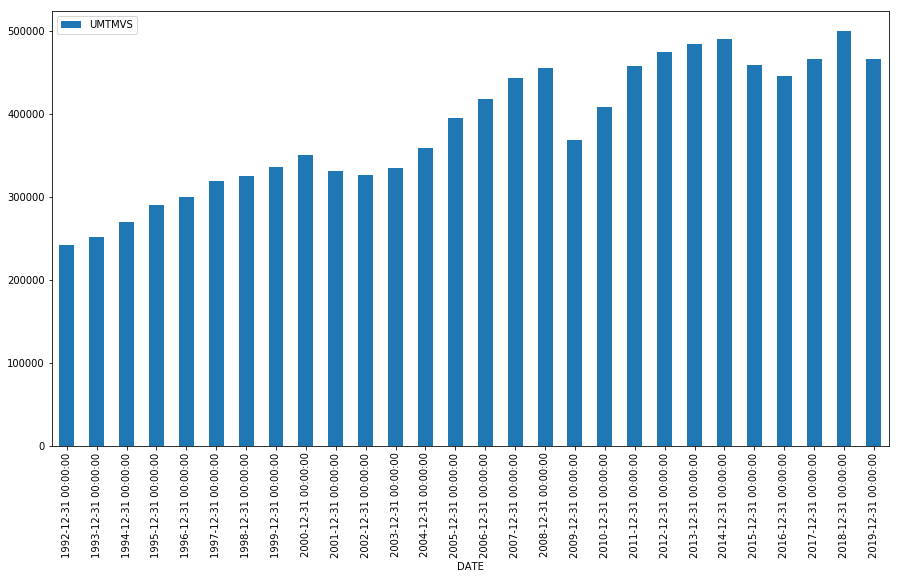

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [105]:
# CODE HERE
#use pct_change() to find the maximum value that is the biggest percentage change out of the resample
#this answer matches the one below
df.resample(rule = 'A').mean().pct_change().idxmax()

UMTMVS   2011-12-31
dtype: datetime64[ns]

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [113]:
#since our data is monthly, not daily, our window will be in month units rather than daily units
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


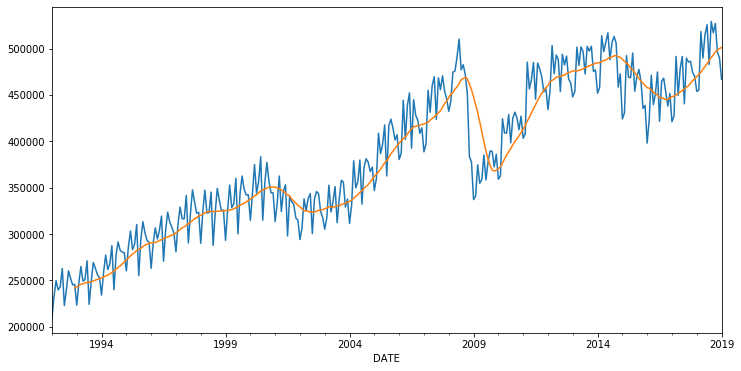

In [110]:
# CODE HERE
#LOOK at when the stock market crashed, man thats crazy
#plotting the daily data against the rolling mean (notice there is no info fot the first few days)
df['UMTMVS'].plot(figsize = (12, 6))
#remember, our window is in monthly units
df.rolling(window = 12).mean()['UMTMVS'].plot()

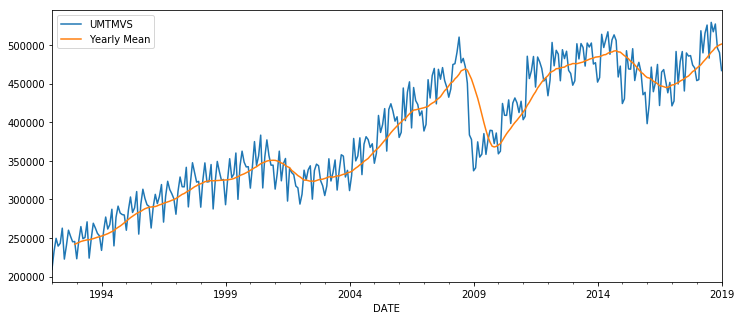

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [125]:
#CODE HERE
df['UMTMVS']['2008'].max()

510081.0

In [129]:
df['UMTMVS']['2008'].idxmax()

Timestamp('2008-06-01 00:00:00')

In [123]:
df_post_peak = df.loc['2008-06-01':]

In [128]:
#so 2014-3-1 was the first date that surpassed this mark, when the market crashed
df_post_peak[df_post_peak.UMTMVS > 510081]

,UMTMVS
DATE,
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0
2018-10-01,527031.0


In [130]:
#get the length of the values between the two dates, since our data is in monthly units
len(df.loc['2008-06-01':'2014-03-01'])

70

70